<a href="https://colab.research.google.com/github/GirishJayakumar/University-of-Illinois-Urbana-Champaign-Research/blob/main/Research_on_the_Effects_of_Student_and_Familial_Factors_on_Student_Academic_Performace_in_Europe_and_Middle_Eastern_Countries_Girish_Jayakumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import matplotlib.pyplot as plt
 import pandas as pd
 import numpy as np
 import seaborn as sns
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.model_selection import train_test_split
 import sklearn.metrics as metrics 
 %matplotlib inline
 from sklearn.tree import export_graphviz
 from sklearn.externals.six import StringIO  
 from IPython.display import Image  
 import pydotplus
 from sklearn.metrics import accuracy_score
 from sklearn import svm
 from sklearn.metrics import classification_report




In [ ]:
!gdown --id 1YUnn9SbsgVxQjuLc4rFyx4NcUyRDDPeH
data = pd.read_csv("xAPI-Edu-Data.csv")
data.info

Downloading...
From: https://drive.google.com/uc?id=1YUnn9SbsgVxQjuLc4rFyx4NcUyRDDPeH
To: /content/xAPI-Edu-Data.csv
100% 38.0k/38.0k [00:00<00:00, 56.8MB/s]


<bound method DataFrame.info of     gender NationalITy  ... StudentAbsenceDays Class
0        M          KW  ...            Under-7     M
1        M          KW  ...            Under-7     M
2        M          KW  ...            Above-7     L
3        M          KW  ...            Above-7     L
4        M          KW  ...            Above-7     M
..     ...         ...  ...                ...   ...
475      F      Jordan  ...            Above-7     L
476      F      Jordan  ...            Under-7     M
477      F      Jordan  ...            Under-7     M
478      F      Jordan  ...            Above-7     L
479      F      Jordan  ...            Above-7     L

[480 rows x 17 columns]>

In [ ]:
data.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

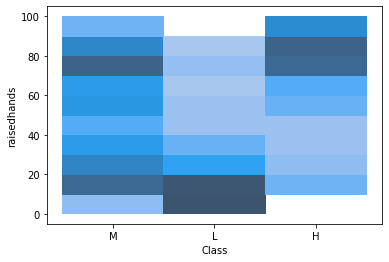

In [ ]:
sns.histplot(x = "Class", y = "raisedhands", data = data)

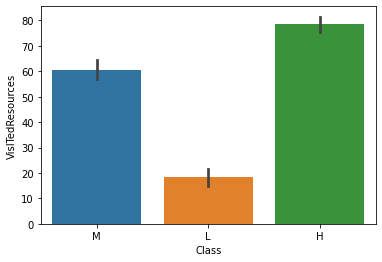

In [ ]:
sns.barplot(x = "Class", y = "VisITedResources", data = data)

In [ ]:
for x in range(480):
  if data.at[x, 'ParentschoolSatisfaction'] == 'Good':
    data.at[x, 'ParentschoolSatisfaction'] = 1
  elif data.at[x, 'ParentschoolSatisfaction'] == 'Bad':
    data.at[x, 'ParentschoolSatisfaction'] = 0
data['ParentschoolSatisfaction']

0      1
1      1
2      0
3      0
4      0
      ..
475    0
476    0
477    0
478    0
479    0
Name: ParentschoolSatisfaction, Length: 480, dtype: object

In [ ]:
for x in range(480):
  if data.at[x, 'StudentAbsenceDays'] == 'Above-7':
    data.at[x, 'StudentAbsenceDays'] = 0
  elif data.at[x, 'StudentAbsenceDays'] == 'Under-7':
    data.at[x, 'StudentAbsenceDays'] = 1
data['StudentAbsenceDays']

0      1
1      1
2      0
3      0
4      0
      ..
475    0
476    1
477    1
478    0
479    0
Name: StudentAbsenceDays, Length: 480, dtype: object

In [ ]:
feature_cols = ['raisedhands', 'VisITedResources','Discussion', 'StudentAbsenceDays']
X = data[feature_cols]
y = data.Class

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1) #65% training and 35% test

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7447916666666666


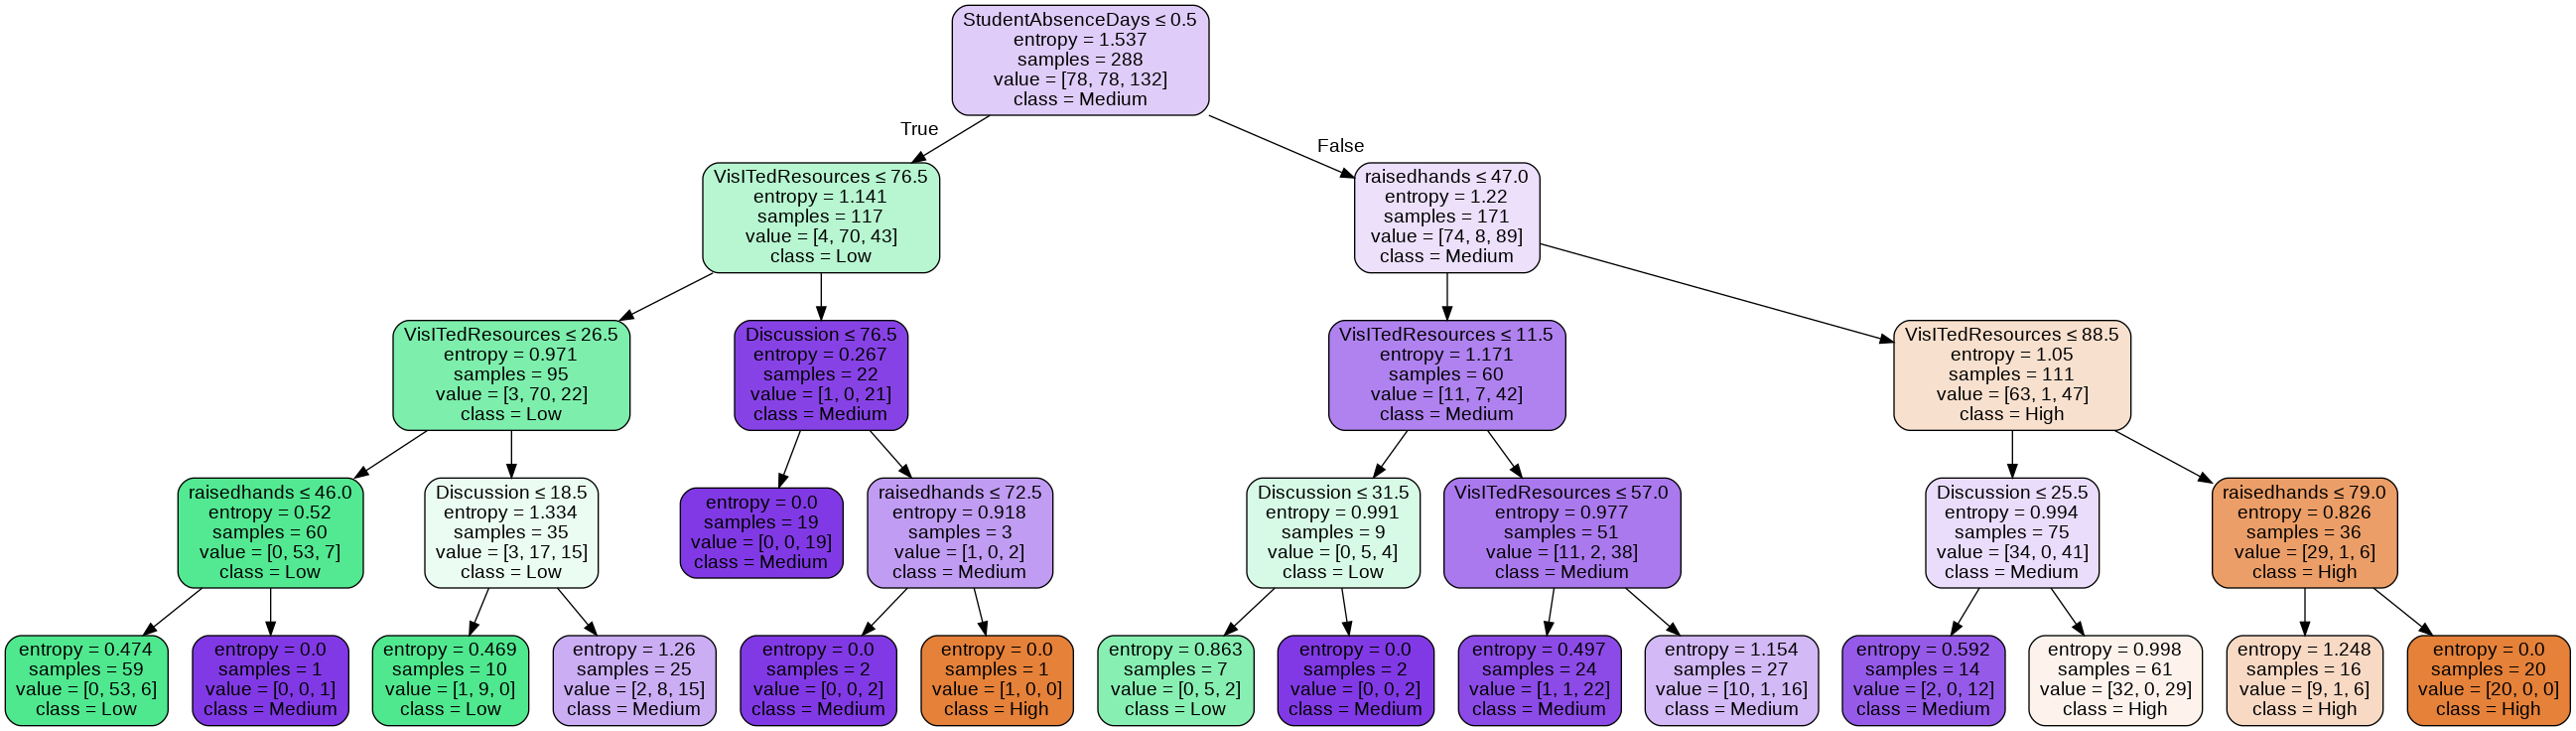

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['High','Low', 'Medium'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('data.png')
Image(graph.create_png())

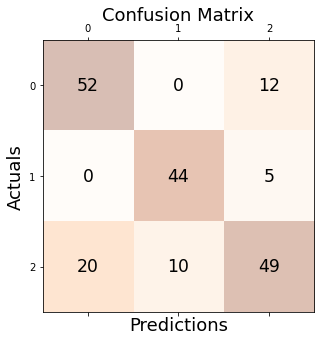

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=['High','Low', 'Medium'], digits=4))


              precision    recall  f1-score   support

        High     0.7222    0.8125    0.7647        64
         Low     0.8148    0.8980    0.8544        49
      Medium     0.7424    0.6203    0.6759        79

    accuracy                         0.7552       192
   macro avg     0.7598    0.7769    0.7650       192
weighted avg     0.7542    0.7552    0.7510       192

